In [2]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14479 (delta 7), reused 13 (delta 7), pack-reused 14460
Receiving objects: 100% (14479/14479), 13.22 MiB | 22.64 MiB/s, done.
Resolving deltas: 100% (9842/9842), done.


In [4]:
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [5]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [6]:
!make


mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [7]:
!ln -s /content/darknet
!ls /mydrive

ln: failed to create symbolic link './darknet': File exists
ls: cannot access '/mydrive': No such file or directory


In [23]:
!ls /content/drive/MyDrive/myyolov4


Img.ipynb  labels_PJ  Oimages  to_yolo_format  yolov4.weights


In [ ]:
! nvidia-smi

Wed Nov 25 06:33:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [10]:
! head /content/darknet/Makefile

GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



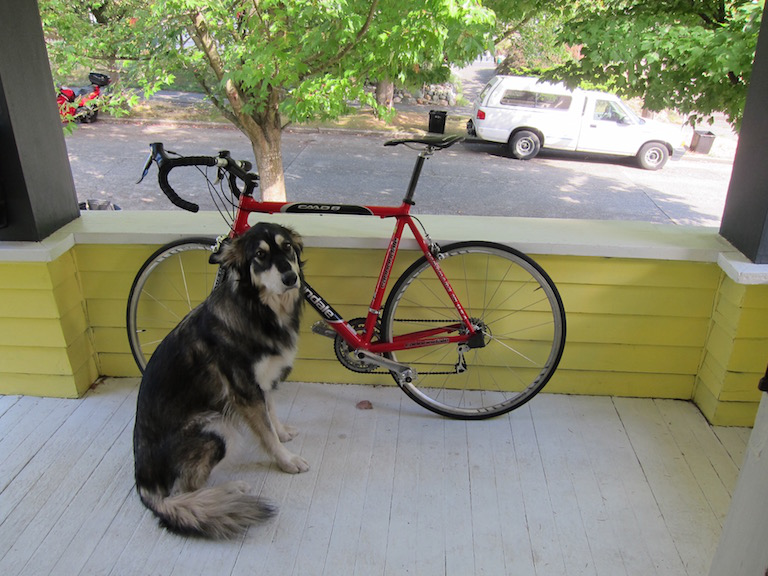

In [ ]:
from PIL import Image

Image.open("/content/darknet/data/dog.jpg")

In [11]:
! cd /content/darknet;  make

chmod +x *.sh


In [26]:
!pwd


/content/darknet


In [20]:
!./darknet detect /content/darknet/cfg/yolov4.cfg /content/drive/MyDrive/myyolov4/yolov4.weights /content/darknet/data/dog.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 rout

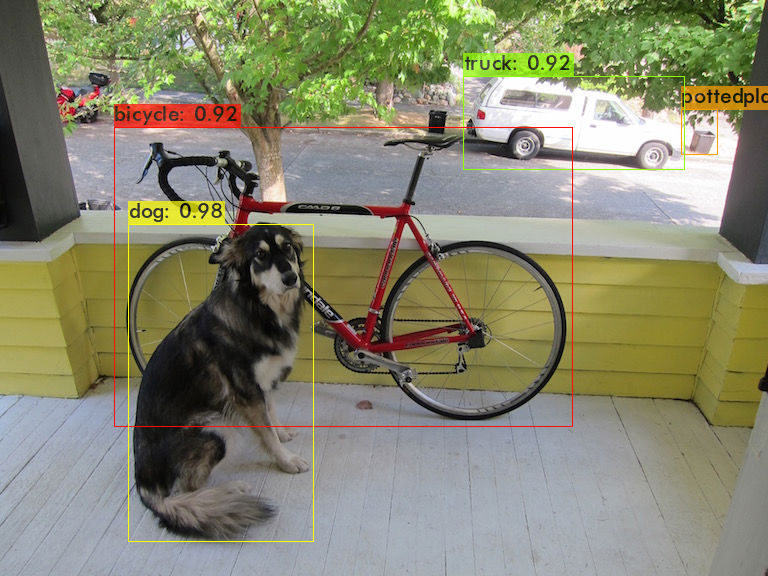

In [21]:
from PIL import Image

Image.open("/content/darknet/predictions.jpg")

In [ ]:
!git clone https://github.com/hai-h-nguyen/Yolo2Pascal-annotation-conversion.git

In [ ]:
from PIL import Image
import os
# 轉 jpg
for img in os.listdir("./content/drive/MyDrive/myyolov4/Oimages"):
    if img.endswith(".png"):
        im = Image.open("./content/drive/MyDrive/myyolov4/Oimages/{}".format(img))
        rgb_im = im.convert("RGB")
        img_name = img.split(".")[0]
        rgb_im.save("./content/drive/MyDrive/myyolov4/Oimages/{}.jpg".format(img_name))
        
# 刪除原始 png 資料
for img in os.listdir("./content/drive/MyDrive/myyolov4/Oimages"):
    if img.endswith(".png"):
        os.remove("./content/drive/MyDrive/myyolov4/Oimages/{}".format(img))

In [ ]:
%cd '/content/darknet/Yolo2Pascal-annotation-conversion/pascal2yolo'
!pwd
!python voc2yolo.py /content/drive/MyDrive/myyolov4/to_yolo_format


In [ ]:
 split data to train and dev
import os, shutil
import random
# 90%訓練 10%驗證
train_ratio = 0.9
train_num = int(round(853 * train_ratio, 0))
# prepare train folder
images_list = []
for img in os.listdir("./data/to_yolo_format"):
    if img.endswith(".jpg"):
        images_list.append(img.split(".")[0])
        
random.shuffle(images_list)
yolo_format_folder = os.path.join("./data/to_yolo_format")
train_folder = os.path.join("train")
dev_folder = os.path.join("dev")
if not os.path.isdir("train"):
    os.mkdir(train_folder)    
if not os.path.isdir("dev"):
    os.mkdir(dev_folder)
# train data 
for train_data in images_list[:train_num]:
    shutil.copyfile(os.path.join(yolo_format_folder, "{}.jpg".format(train_data)),  
                    os.path.join(train_folder, "{}.jpg".format(train_data)))
    shutil.copyfile(os.path.join(yolo_format_folder, "{}.txt".format(train_data)),  
                    os.path.join(train_folder, "{}.txt".format(train_data)))
   
# dev data
for test_data in images_list[train_num+1:]:
    shutil.copyfile(os.path.join(yolo_format_folder, "{}.jpg".format(test_data)),  
                    os.path.join(dev_folder, "{}.jpg".format(test_data)))
    shutil.copyfile(os.path.join(yolo_format_folder, "{}.txt".format(test_data)),  
                    os.path.join(dev_folder, "{}.txt".format(test_data)))
# show total data 
print("="*35)
print("number of training set :", len(os.listdir(train_folder)))
print("number of dev set :", len(os.listdir(dev_folder)))
print("="*35)

In [ ]:
# 輸出 train.txt
cd train
ls -d "$PWD"/*.jpg > train.txt
# 輸出 dev.txt
cd dev
ls -d "$PWD"/*.jpg > dev.txt

In [ ]:
! cd /content/darknet; ./darknet detector train data/mask.data cfg/yolov4-mask.cfg weights/yolov4.conv.137 -dont_show

In [ ]:
./darknet detector test data/mask.data cfg/yolov4-mask.cfg backup/yolov4-mask_3000.weights data/input.jpg